Перед началом работы импортируем все необходимые для анализа и представления результатов библиотеки.

In [1]:
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from pymorphy3 import MorphAnalyzer
import matplotlib.pyplot as plt
import pandas as pd
import re
from wordcloud import WordCloud
import string
import numpy as np
from PIL import Image

morph = MorphAnalyzer()

###nltk.download('averaged_perceptron_tagger_eng')
###nltk.download('wordnet')
###nltk.download('stopwords')
###nltk.download('punkt_tab')

Текст для анализа был так и скачан из интернета в виде текстового файла, поэтому нет части с парсингом данных.

Указываем путь к файлу с исходным текстом.

In [2]:
path = '/Хроники Нарнии Ru.txt'
with open(path, encoding='utf-8') as txt:
    The_Chronicles_Ru = txt.read()

In [3]:
path = '/The Chronicles Of Narnia Eng.txt'
with open(path, encoding='utf-8') as txt:
    The_Chronicles_Eng = txt.read()

Небольшая предобработка текста. Приводим его к нижнему регистру и убирает знаки препинания.

In [4]:
def preprocessing(text):
    lower_text = text.lower()
    without_punkt = re.sub(r'[^\w\s]', '', lower_text)
    clean_text = re.sub(r'\n+', ' ', without_punkt)
    return clean_text

Сохраняем текст в отдельные переменные.

In [5]:
clean_ru_text = preprocessing(The_Chronicles_Ru)
clean_eng_text = preprocessing(The_Chronicles_Eng)

Подсчитываем количество слов в тексте, количество уникальных слов и коэффициент лексического разнообразия.

In [6]:
def ttr(text):
    ###посчитаем количество слов
    word_count = len(text.split()) #
    unique_word_count = len(set(text.split()))
    ###посчитаем TTR
    ttr = unique_word_count/word_count
    return ' - oбщее количество слов в тексте ' + str(word_count) + '. \n - уникальных слова в тексте ' + str(unique_word_count) + '. \n - type token ratio составляет ' + str(ttr)

In [7]:
print('В переведенной на русский язык версии текста: \n' + ttr(clean_ru_text))

В переведенной на русский язык версии текста: 
 - oбщее количество слов в тексте 215218. 
 - уникальных слова в тексте 29205. 
 - type token ratio составляет 0.1356996162031057


In [8]:
print('В оригинальной версии текста: \n' + ttr(clean_eng_text))

В оригинальной версии текста: 
 - oбщее количество слов в тексте 319507. 
 - уникальных слова в тексте 12602. 
 - type token ratio составляет 0.03944201535490615


Токинезируем текст, составляем частотные словари и графики распределения для первых топ-20 слов.

In [9]:
def word_freq_ru(text):
    stopwords_ru = stopwords.words('russian')
    tokenize_text = word_tokenize(text)
    without_stop_words = ' '.join([token for token in tokenize_text if token not in stopwords_ru])
    tokenize_text = word_tokenize(without_stop_words)
    word_frequencies =  FreqDist(tokenize_text)
    sorted_word = sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)
    top20 = sorted_word[:20]
    print(top20)
    print(word_frequencies.plot(20, title='Топ-20 слов в цикле "Хроники Нарнии" перевод'))

[('сказал', 1512), ('это', 1510), ('люси', 765), ('сказала', 540), ('джил', 532), ('эдмунд', 462), ('очень', 456), ('аслан', 429), ('каспиан', 380), ('король', 369), ('питер', 335), ('нарнии', 320), ('дигори', 319), ('спросил', 293), ('нам', 284), ('шаста', 259), ('сьюзен', 255), ('пока', 243), ('словно', 233), ('снова', 228)]
Axes(0.125,0.11;0.775x0.77)


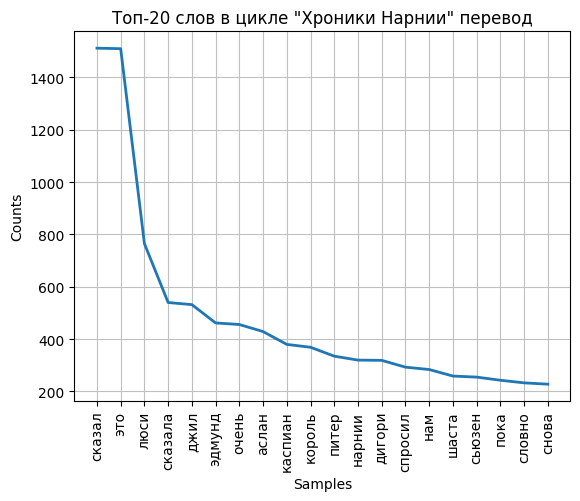

In [10]:
word_freq_ru(clean_ru_text)

In [11]:
def word_freq_ru(text):
    stopwords_eng = stopwords.words('english')
    tokenize_text = word_tokenize(text)
    without_stop_words = ' '.join([token for token in tokenize_text if token not in stopwords_eng])
    tokenize_text = word_tokenize(without_stop_words)
    word_frequencies =  FreqDist(tokenize_text)
    sorted_word = sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)
    top20 = sorted_word[:20]
    print(top20)
    print(word_frequencies.plot(20, title='Топ-20 слов в цикле "Хроники Нарнии" оригинал'))

[('said', 4052), ('one', 1173), ('like', 1042), ('would', 1002), ('could', 989), ('see', 812), ('came', 723), ('back', 685), ('lucy', 685), ('little', 659), ('aslan', 635), ('great', 631), ('go', 597), ('know', 593), ('dont', 589), ('well', 587), ('come', 576), ('time', 561), ('king', 545), ('narnia', 537)]
Axes(0.125,0.11;0.775x0.77)


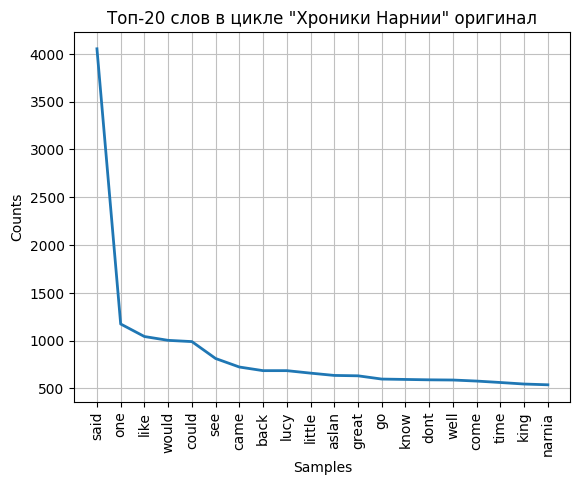

In [12]:
word_freq_ru(clean_eng_text)

**Общий вывод**, который можно сделать по итогу первого этапа: несмотря на то, что в оригинальной версии текста больше слов в абсолютном выражении, лексическое разнообразие ниже, чем в переводе на русский язык.

Собираем лемматизированный текст.

Для лемматизиции русского текста используем pymorphy3.

In [13]:
def lemmas_ru(text):
  lemmas = []
  for token in word_tokenize(text):
    token_lemma = morph.parse(token)[0].normal_form
    lemmas.append(token_lemma)
  lemmatized_text = ' '.join(lemmas)
  return lemmatized_text

Английский текст лемматизируем с поиощью NLTK.

In [14]:
def lemmas_eng(text):
  lemmatizer = WordNetLemmatizer()
  tokens = word_tokenize(text)
  lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
  lemmatized_text = ' '.join(lemmatized_words)
  return lemmatized_text

Создаем отдельные переменные с текстом.

In [15]:
lemma_ru_text = lemmas_ru(clean_ru_text)
lemma_eng_text = lemmas_eng(clean_eng_text)

Ищес все палиндромы в тексте и разбиваем из на токены.

In [16]:
def find_palindrome(text):
    list_of_palindrome = []
    for i in text.split():
        if len(i) > 2 and i == i[::-1]:
            list_of_palindrome.append(i)

    joined_text = ' '.join(list_of_palindrome)
    token = word_tokenize(joined_text)
    return token

In [17]:
print('Количество палиндромов в цикле "Хроники Нарнии" в переводе на русский язык не лемматизированная версия текста: ' + str(len(find_palindrome(clean_ru_text))))
print('Количество палиндромов в цикле "Хроники Нарнии" в оригинале не лемматизированная версия текста: ' + str(len(find_palindrome(clean_eng_text))))
print('Количество палиндромов в цикле "Хроники Нарнии" в переводе на русский язык лемматизированная версия текста: ' + str(len(find_palindrome(lemma_ru_text))))
print('Количество палиндромов в цикле "Хроники Нарнии" в оригинале лемматизированная версия текста: ' + str(len(find_palindrome(lemma_eng_text))))

Количество палиндромов в цикле "Хроники Нарнии" в переводе на русский язык не лемматизированная версия текста: 3706
Количество палиндромов в цикле "Хроники Нарнии" в оригинале не лемматизированная версия текста: 719
Количество палиндромов в цикле "Хроники Нарнии" в переводе на русский язык лемматизированная версия текста: 3773
Количество палиндромов в цикле "Хроники Нарнии" в оригинале лемматизированная версия текста: 986


In [18]:
print('Количество уникальных палиндромов в цикле "Хроники Нарнии" в переводе на русский язык не лемматизированная версия текста: ' + str(len(set(find_palindrome(clean_ru_text)))))
print('Количество уникальных палиндромов в цикле "Хроники Нарнии" в оригинале не лемматизированная версия текста: ' + str(len(set((find_palindrome(clean_eng_text))))))
print('Количество уникальных палиндромов в цикле "Хроники Нарнии" в переводе на русский язык лемматизированная версия текста: ' + str(len(set((find_palindrome(lemma_ru_text))))))
print('Количество уникальных палиндромов в цикле "Хроники Нарнии" в оригинале лемматизированная версия текста: ' + str(len(set(find_palindrome(lemma_eng_text)))))

Количество уникальных палиндромов в цикле "Хроники Нарнии" в переводе на русский язык не лемматизированная версия текста: 45
Количество уникальных палиндромов в цикле "Хроники Нарнии" в оригинале не лемматизированная версия текста: 26
Количество уникальных палиндромов в цикле "Хроники Нарнии" в переводе на русский язык лемматизированная версия текста: 31
Количество уникальных палиндромов в цикле "Хроники Нарнии" в оригинале лемматизированная версия текста: 26


Отрисовываем облака слов.

In [19]:
def wordClouds(text):
  text = str(find_palindrome(text))
  text = re.sub(r'[^\w\s]', '', text)
  STOPWORDS_RU = stopwords.words('russian')
  wordcloud = WordCloud(width = 5000,
                      height = 3000,
                      random_state=1,
                      background_color='black',
                      margin=20,
                      colormap='Pastel1',
                      collocations=False, ).generate(text)

  plt.imshow(wordcloud)
  plt.axis("off")

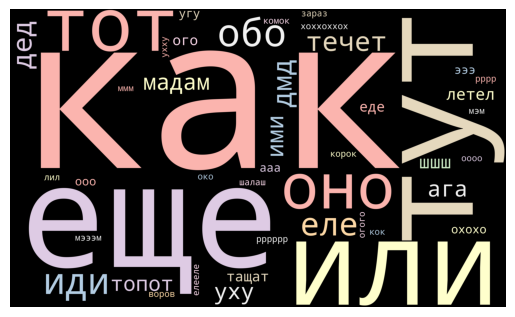

In [20]:
wordClouds(clean_ru_text)

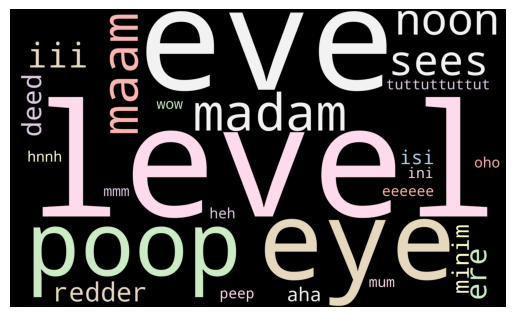

In [21]:
wordClouds(clean_eng_text)

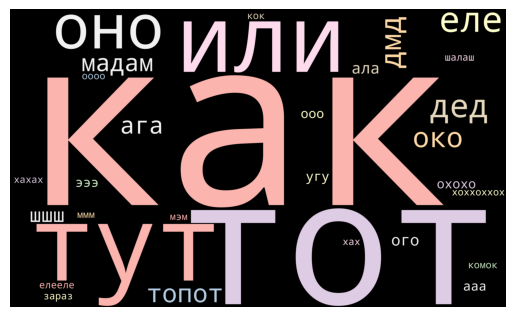

In [22]:
wordClouds(lemma_ru_text)

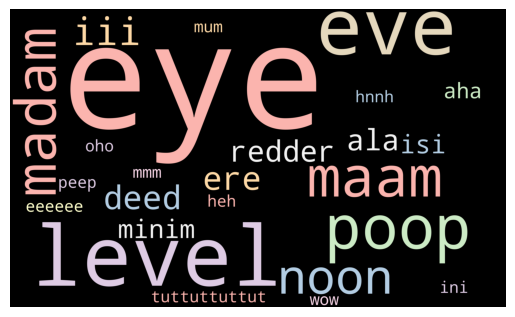

In [23]:
wordClouds(lemma_eng_text)

Частеречная разметка получившегося результата.

In [24]:
def result_ru(text):
  tokens = []
  lemmas = []
  pos_tags = []
  text = str(set(find_palindrome(text)))
  text = re.sub(r'[^\w\s]', '', text)
  for token in word_tokenize(text):
    token_parsed = morph.parse(token)[0]
    tokens.append(token)
    lemmas.append(token_parsed.normal_form)
    pos_tags.append(token_parsed.tag.POS)


  df = pd.DataFrame({'token': tokens,
                   'lemma': lemmas,
                   'pos_tag': pos_tags})

  return df

In [25]:
result_ru(clean_ru_text)

,token,lemma,pos_tag
0,ааа,ааа,INTJ
1,ооо,ооо,NOUN
2,хоххоххох,хоххоххох,NOUN
3,угу,угу,INTJ
4,топот,топот,NOUN
5,тот,тот,ADJF
6,летел,лететь,VERB
7,ими,они,NPRO
8,корок,корка,NOUN
9,еще,ещё,ADVB
